# Voice Gender Recognition Using Machine Learning

In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')
# read file
voice=pd.read_csv(r"C:\Users\Asus\OneDrive\Documents\voice.csv")
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [3]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [4]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [6]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


# Preprocessing: label encoder and normalization

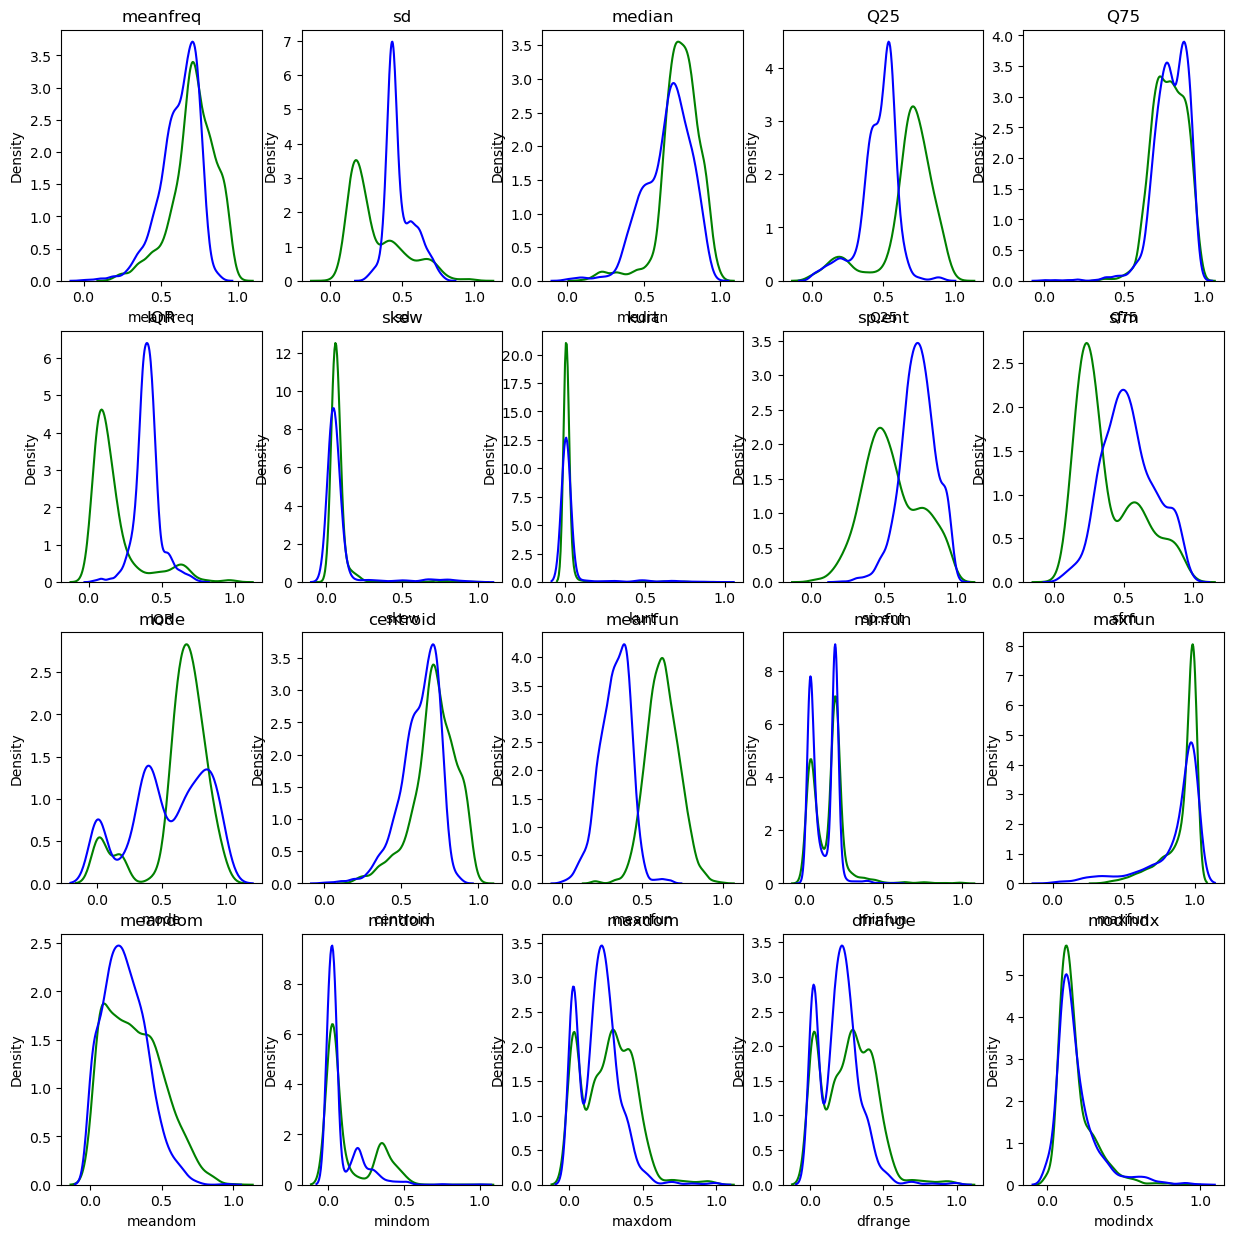

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')
#At first glance, most significant features are Q25, IQR and meanfun. We will build models by using the 20 features and the 3 distinct features.
#Using K-Nearest Neighbors, Naive Bayes, Decision Tree, Random Forest, XgBoost, Support Vector Machine, Neural Network to build models.


In [8]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost

In [9]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [10]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1121,0.725487,0.484372,0.691063,0.560327,0.951001,0.458290,0.062839,0.005038,0.609530,0.446648,...,0.725487,0.507481,0.217043,0.990585,0.474261,0.040860,0.432809,0.432403,0.118874,1.0
1308,0.679459,0.401218,0.751185,0.498801,0.773499,0.350096,0.046101,0.003318,0.713273,0.435030,...,0.679459,0.399662,0.192118,0.990585,0.462812,0.040860,0.265547,0.265021,0.174699,1.0
990,0.636999,0.449637,0.715691,0.459542,0.765807,0.383455,0.037997,0.002281,0.816509,0.673713,...,0.636999,0.390498,0.204627,0.999749,0.300565,0.040860,0.226948,0.226395,0.179647,1.0
2018,0.690854,0.419052,0.771567,0.728665,0.753806,0.091990,0.072516,0.005899,0.643579,0.551945,...,0.690854,0.642051,0.049021,0.751054,0.158588,0.006452,0.230879,0.231044,0.150323,0.0
2955,0.450863,0.844859,0.764883,0.038510,0.748263,0.804213,0.862466,0.754962,0.191257,0.401311,...,0.450863,0.586488,0.042110,0.954963,0.000000,0.006452,0.000000,0.000000,0.000000,0.0


In [11]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [12]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [13]:
def classify(model,x_train,y_train,x_test,y_test):
    from sklearn.metrics import classification_report
    target_names = ['female', 'male']
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

# K-Nearest Neighbors
Using neighbors.KNeighborsClassifier() to build the model.

In [14]:
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.015772870662460567 occurs at k=2.


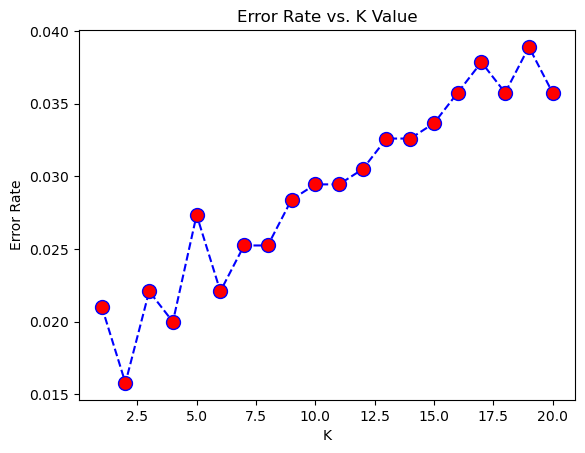

In [15]:
k=knn_error(21,x_train,y_train,x_test,y_test)

In [16]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9800    0.9899    0.9849       494
        male     0.9889    0.9781    0.9835       457

    accuracy                         0.9842       951
   macro avg     0.9844    0.9840    0.9842       951
weighted avg     0.9843    0.9842    0.9842       951



Lowest error is 0.023133543638275498 occurs at k=11.


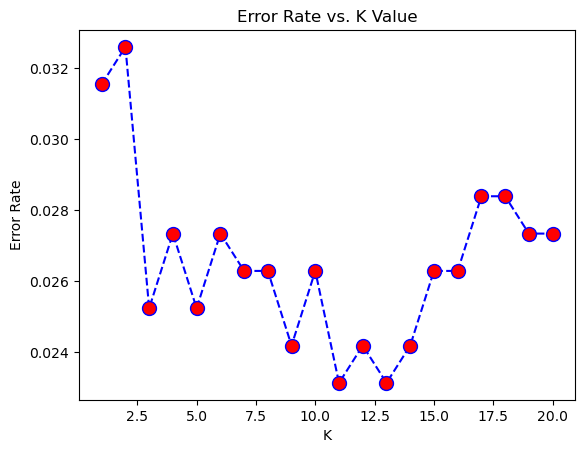

In [17]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

In [18]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9916    0.9514    0.9711       494
        male     0.9497    0.9912    0.9700       457

    accuracy                         0.9706       951
   macro avg     0.9706    0.9713    0.9705       951
weighted avg     0.9714    0.9706    0.9706       951



# Naive Bayes
Using naive_bayes.GaussianNB() to build the model.

In [19]:
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9376    0.8826    0.9093       494
        male     0.8807    0.9365    0.9077       457

    accuracy                         0.9085       951
   macro avg     0.9091    0.9096    0.9085       951
weighted avg     0.9103    0.9085    0.9085       951



In [20]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9795    0.9676    0.9735       494
        male     0.9654    0.9781    0.9717       457

    accuracy                         0.9727       951
   macro avg     0.9725    0.9729    0.9726       951
weighted avg     0.9727    0.9727    0.9727       951



# Decision Tree
Using tree.DecisionTreeClassifier() to build the model.

In [21]:
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.030494216614090432 occurs at n=9.


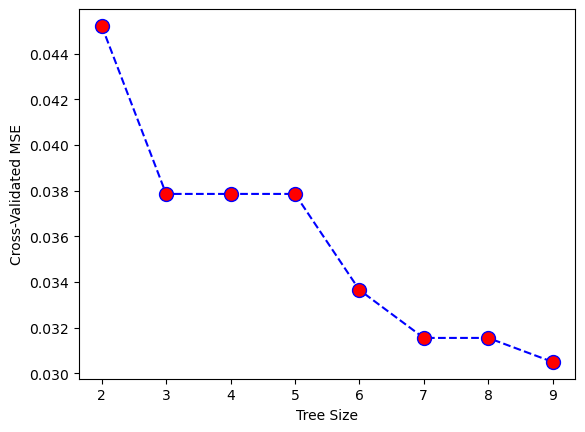

In [22]:
n=dt_error(10,x_train,y_train,x_test,y_test)

In [23]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9568    0.9858    0.9711       494
        male     0.9842    0.9519    0.9677       457

    accuracy                         0.9695       951
   macro avg     0.9705    0.9688    0.9694       951
weighted avg     0.9699    0.9695    0.9695       951



Lowest error is 0.026288117770767613 occurs at n=7.


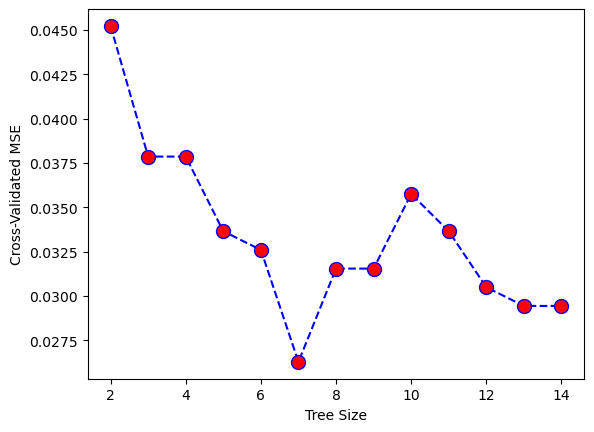

In [24]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

In [25]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9737    0.9757    0.9747       494
        male     0.9737    0.9716    0.9726       457

    accuracy                         0.9737       951
   macro avg     0.9737    0.9736    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951



# Random Forest
Using ensemble.RandomForestClassifier() to build the model.

In [26]:
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.01892744479495268 occurs at n=21.


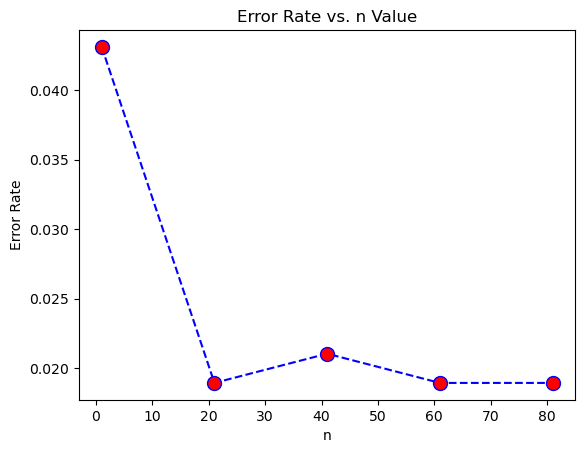

In [27]:
e=rf_error(100,x_train,y_train,x_test,y_test)

In [28]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9759    0.9838    0.9798       494
        male     0.9823    0.9737    0.9780       457

    accuracy                         0.9790       951
   macro avg     0.9791    0.9788    0.9789       951
weighted avg     0.9790    0.9790    0.9790       951



Lowest error is 0.027339642481598318 occurs at n=61.


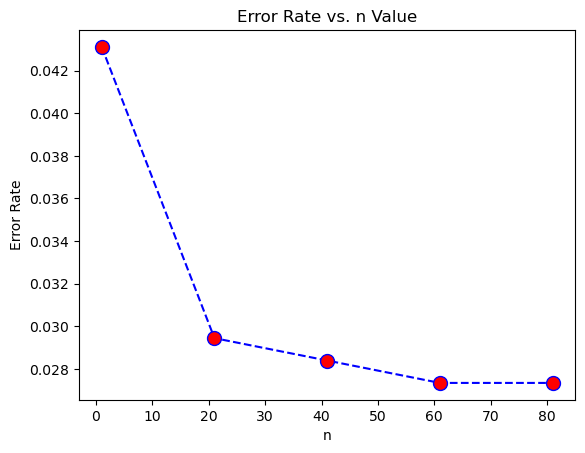

In [29]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

In [30]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9662    0.9838    0.9749       494
        male     0.9821    0.9628    0.9724       457

    accuracy                         0.9737       951
   macro avg     0.9742    0.9733    0.9737       951
weighted avg     0.9739    0.9737    0.9737       951



# XgBoost
Using xgboost.XGBClassifier() to build the model.

In [31]:
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9760    0.9899    0.9829       494
        male     0.9889    0.9737    0.9813       457

    accuracy                         0.9821       951
   macro avg     0.9825    0.9818    0.9821       951
weighted avg     0.9822    0.9821    0.9821       951



In [32]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9565    0.9798    0.9680       494
        male     0.9775    0.9519    0.9645       457

    accuracy                         0.9664       951
   macro avg     0.9670    0.9658    0.9663       951
weighted avg     0.9666    0.9664    0.9663       951



# Support Vector Machine
Using svm.SVC() to build the model.

In [33]:
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i).fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [34]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i).fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [35]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9769959404600812
rbf  out-of-sample accuracy in SVM:  0.982124079915878
poly  in-sample accuracy in SVM:  0.9806044203879116
poly  out-of-sample accuracy in SVM:  0.9842271293375394
linear  in-sample accuracy in SVM:  0.9715832205683356
linear  out-of-sample accuracy in SVM:  0.9758149316508938
Highest accuracy is 0.9842271293375394 occurs at poly kernel.


Lowest error is 0.015772870662460567 occurs at C=1.


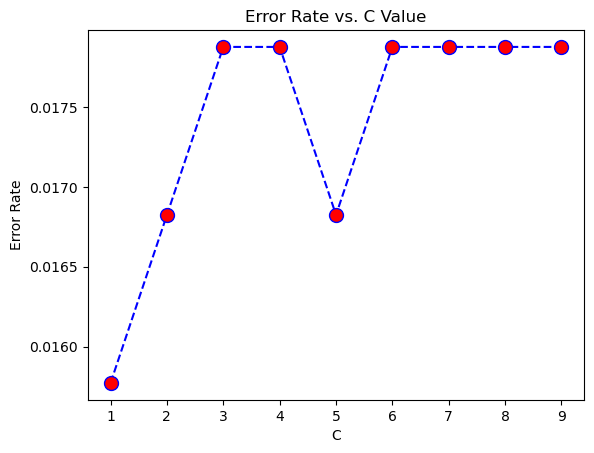

In [36]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

In [37]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9800    0.9899    0.9849       494
        male     0.9889    0.9781    0.9835       457

    accuracy                         0.9842       951
   macro avg     0.9844    0.9840    0.9842       951
weighted avg     0.9843    0.9842    0.9842       951



In [38]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9720342805593144
rbf  out-of-sample accuracy in SVM:  0.9747634069400631
poly  in-sample accuracy in SVM:  0.9688768606224628
poly  out-of-sample accuracy in SVM:  0.9758149316508938
linear  in-sample accuracy in SVM:  0.9652683806946324
linear  out-of-sample accuracy in SVM:  0.9684542586750788
Highest accuracy is 0.9758149316508938 occurs at poly kernel.


Lowest error is 0.024185068349106203 occurs at C=1.


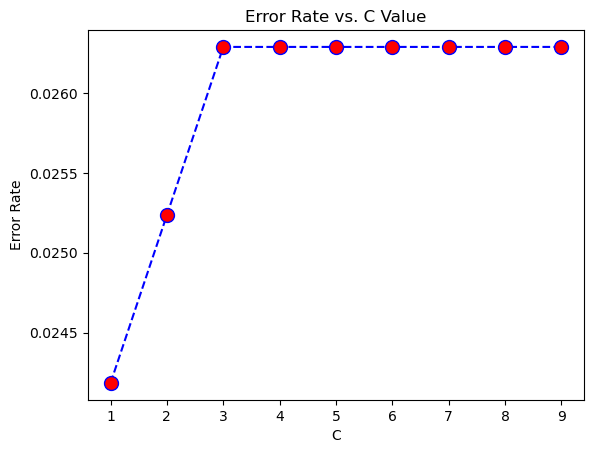

In [39]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

In [40]:
model=svm.SVC(kernel=k,C=c)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9777    0.9757    0.9767       494
        male     0.9738    0.9759    0.9749       457

    accuracy                         0.9758       951
   macro avg     0.9757    0.9758    0.9758       951
weighted avg     0.9758    0.9758    0.9758       951



# Neural Network
Using neural_network.MLPClassifier to build the model.

In [41]:
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.025236593059936908 occurs at C=17.


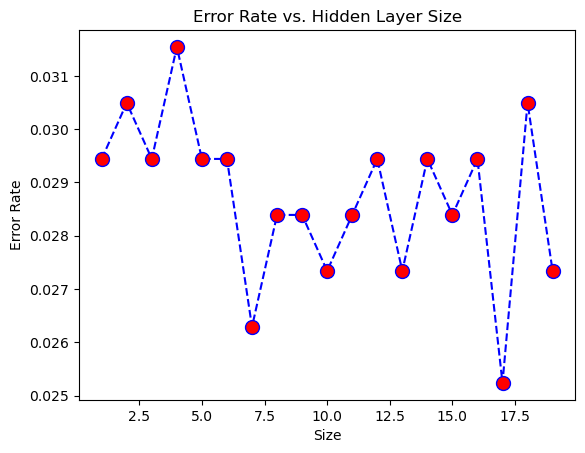

In [42]:
h=nn_error(20,x_train,y_train,x_test,y_test)

In [43]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

      female     0.9757    0.9757    0.9757       494
        male     0.9737    0.9737    0.9737       457

    accuracy                         0.9748       951
   macro avg     0.9747    0.9747    0.9747       951
weighted avg     0.9748    0.9748    0.9748       951



Lowest error is 0.026288117770767613 occurs at C=19.


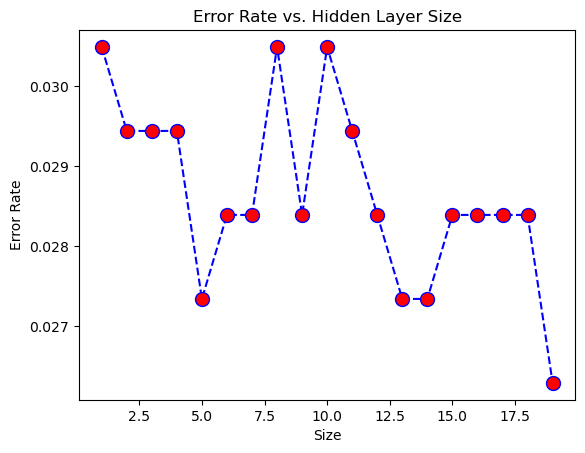

In [44]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

In [45]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3)

              precision    recall  f1-score   support

      female     0.9757    0.9737    0.9747       494
        male     0.9716    0.9737    0.9727       457

    accuracy                         0.9737       951
   macro avg     0.9736    0.9737    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951



In [46]:
#We can see that the highest accurracy is 98.74% which is made by XgBoost

In [47]:
voice['sd'] = voice['sd'].astype('int64')

In [48]:
SD = voice['sd']

In [49]:
if (SD < 0.05).any():  # Use .any() to check if any value in 'sd' is less than 0.05
    print("It is a female")
else:
    print("It is a male")

It is a female


In [50]:
#it predicted female